In [1]:
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
from nltk import sent_tokenize, word_tokenize
from IPython.display import display
import re
import json
import matplotlib.pyplot as plt

In [2]:
with open('../../not-gitted/argsme-1.0-cleaned/args-me-1.0-cleaned-as-list.json', 'r') as f:
        d = json.load(f)

In [3]:
len(d)

382545

In [4]:
print(json.dumps(d[13254], indent=2))

{
  "premises": [
    {
      "text": "I stand in affirmation. First I will start with definitions Lodz Ghetto- The Jew \"Ghetto\" Which existed from 1939 until 1944 during WWII Jew- a person whose religion is Judaism. (dictionary.com) Rumkowski- Mordechai Chaim Rumkowski, the Alteste (Elder of the Jews) of the inhabitants of the Lodz Ghetto. With that out of the way, i'm going to state a couple of reasons why I believe he did help the poor Jews in the ghetto. 1. He allegedly cut down the first deportations of Jews and Gypsies to the concentration camp (Chelmna) in half. 2. He made the ghetto valuable to the Nazis by making factories which supplied the Germans with everything from munitions to textiles. Therefore, the Nazis were more reluctant to kill all the Jews in the ghetto. 3. He preserved the ghetto and it was the longest lasting ghetto of the war. 4. Around 800 people eventually survived the ordeal, the largest of any ghetto. I hope someone decided to debate this with me.",
    

# Filter conclusions

In [5]:
def get_conclusions(arguments):
    rows = list()
    for argument in tqdm(arguments):
        conclusion = argument['conclusion']
        id = argument['id']
        conc_len = len(word_tokenize(conclusion))
        rows.append({'id': id, 'conclusion': conclusion, 'conc_len': conc_len})

    rows = list({v['id'][:-9]: v for v in rows}.values())
    args = pd.DataFrame.from_records(rows)
    #args.to_csv('results/conclusions.csv', index
    return args

In [6]:
conclusions = get_conclusions(d)
conclusions

100%|████████████████████████████████████████████████████████████████████████| 382545/382545 [00:43<00:00, 8775.43it/s]


,id,conclusion,conc_len
0,c67482ba-2019-04-18T13:32:05Z-00003-000,Contraceptive Forms for High School Students,6
1,4d3d4471-2019-04-18T11:45:01Z-00003-000,Australia should be a more significant country,7
2,fbe6ad2-2019-04-18T11:12:36Z-00006-000,The closet dementia of the superior ego god co...,20
3,3e59690a-2019-04-18T16:49:22Z-00002-000,Composition Contest,2
4,c3e9c4a6-2019-04-18T14:36:11Z-00004-000,Debates are harder when you are the first one ...,14
...,...,...,...
59628,87d0ccd3-2019-04-17T11:47:45Z-00048-000,Prostitution,1
59629,a7c47a5c-2019-04-17T11:47:49Z-00003-000,Legalization of drugs,3
59630,36fa654a-2019-04-17T11:47:28Z-00026-000,Banks are unlikely to pass tax on to consumers,9
59631,2772ce32-2019-04-17T11:47:25Z-00007-000,Ground zero mosque,3


__Filter conclusions that are have length above average+std__

<AxesSubplot:>

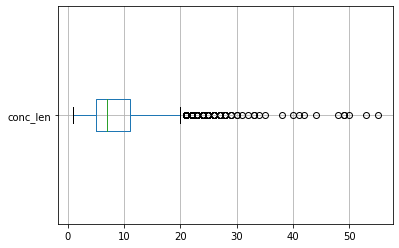

In [7]:
conclusions.boxplot(column='conc_len', vert=False)#, rot=90)
#conclusions[['conc_len']].T.boxplot(vert=False)
#plt.subplots_adjust(left=0.25)
#plt.show()

C:\ProgramData\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


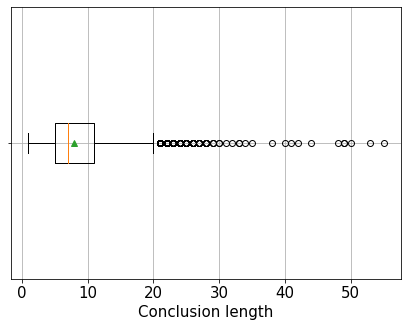

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(conclusions.conc_len.values, vert=False, showmeans=True, labels=[''])
ax.grid(True)
ax.set_xlabel("Conclusion length", size=15)
ax.set_xticklabels(range(-10,60,10), size=15)
#plt.ylabel("Calorie Burnage")
plt.savefig('conc_len_boxplot.pdf')

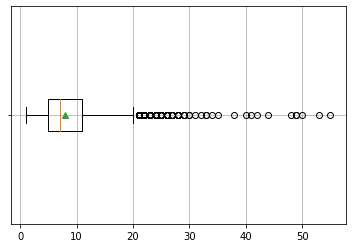

In [15]:
plt.boxplot(conclusions.conc_len.values, vert=False, showmeans=True, labels=[''])
plt.grid(True)
plt.show()

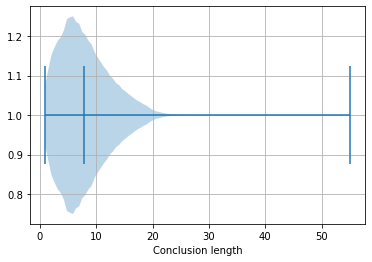

In [18]:
plt.violinplot(conclusions.conc_len.values, vert=False,showmeans=True,showextrema=True)
plt.grid(True)
plt.xlabel("Conclusion length")
#plt.ylabel("Calorie Burnage")
plt.savefig('conc_len.violinplot.pdf')

<AxesSubplot:ylabel='Density'>

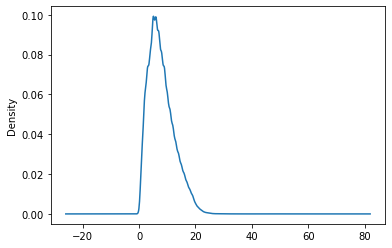

In [23]:
conclusions.conc_len.plot(kind='density')

<AxesSubplot:>

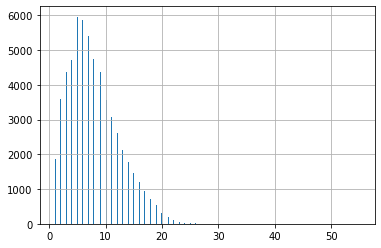

In [28]:
conclusions.conc_len.hist(bins=300)

In [7]:
mean_length = np.mean(conclusions.conc_len.values)
std_length = np.std(conclusions.conc_len.values)
print(f'mean = {mean_length}\n std = {std_length}')
threshold = mean_length + std_length

mean = 7.904633340600004
 std = 4.512036141161882


In [13]:
mean_length + std_length

12.416669481761886

In [14]:
filtered_conclusions = conclusions[conclusions.conc_len>=threshold]
filtered_conclusions

,id,conclusion,conc_len
2,fbe6ad2-2019-04-18T11:12:36Z-00006-000,The closet dementia of the superior ego god co...,20
4,c3e9c4a6-2019-04-18T14:36:11Z-00004-000,Debates are harder when you are the first one ...,14
13,ffd45b01-2019-04-18T18:54:19Z-00005-000,Anybody who used performance enhancing drugs i...,18
41,fb0633f8-2019-04-18T15:37:26Z-00005-000,Is it ok for a women to kick a guy in the balls,13
42,f11351ad-2019-04-18T13:01:46Z-00000-000,Who should be the next President of the United...,22
...,...,...,...
59521,92418529-2019-04-17T11:47:30Z-00028-000,"If we could go to the Moon in 1969, we can go ...",17
59549,66e94586-2019-04-17T11:47:39Z-00004-000,The leader of a socialist party will not suppo...,13
59558,b1ddd96f-2019-04-17T11:47:40Z-00056-000,Some spin-off technology will come from unmann...,16
59559,d67f6b84-2019-04-17T11:47:43Z-00317-000,Iran's influence in Iraq would grow significan...,14


__Conclusions are not questions__ [Eggs 2000](file:///C:/Users/Jonas/OneDrive/Library/ca/Text-%20und%20Gespr%C3%A4chslinguistik%20Ein%20internationales%20Handbuch%20zeitgen%C3%B6ssischer%20Forschung,%20Band%201%20Linguistics%20of%20Text%20and%20Conversation%20An%20International%20Handbook%20of%20Contemporary%20Research%20by%20Klaus%20Brinker,%20(z-lib.org).pdf) (p.397 ff.)

In [15]:
filtered_conclusions.loc[[42]].conclusion

42    Who should be the next President of the United...
Name: conclusion, dtype: object

Questions are introduced by:

In [32]:
question_marker = {'who', 'where', 'what', 'how', 'which', 'why', 'is', 'are', 'do', 'does', 'did', 'was', 'were'}

In [34]:
for m in question_marker:
    print(r'\text{'+m+r'},')

\text{which},
\text{who},
\text{were},
\text{was},
\text{did},
\text{are},
\text{where},
\text{does},
\text{why},
\text{do},
\text{how},
\text{what},
\text{is},


In [17]:
filtered_conclusions = filtered_conclusions[filtered_conclusions.conclusion.apply(lambda c: word_tokenize(c)[0].lower() not in question_marker)]
filtered_conclusions

,id,conclusion,conc_len
2,fbe6ad2-2019-04-18T11:12:36Z-00006-000,The closet dementia of the superior ego god co...,20
4,c3e9c4a6-2019-04-18T14:36:11Z-00004-000,Debates are harder when you are the first one ...,14
13,ffd45b01-2019-04-18T18:54:19Z-00005-000,Anybody who used performance enhancing drugs i...,18
45,93953a8c-2019-04-18T15:19:33Z-00000-000,"In Western Countries, Men's rights are more of...",17
52,dec39437-2019-04-18T19:47:38Z-00005-000,Liberals should become more optimistic about t...,14
...,...,...,...
59521,92418529-2019-04-17T11:47:30Z-00028-000,"If we could go to the Moon in 1969, we can go ...",17
59549,66e94586-2019-04-17T11:47:39Z-00004-000,The leader of a socialist party will not suppo...,13
59558,b1ddd96f-2019-04-17T11:47:40Z-00056-000,Some spin-off technology will come from unmann...,16
59559,d67f6b84-2019-04-17T11:47:43Z-00317-000,Iran's influence in Iraq would grow significan...,14


In [18]:
filtered_conclusions.describe()

,conc_len
count,9065.000000
mean,15.660673
std,2.740067
min,13.000000
25%,14.000000
50%,15.000000
75%,17.000000
max,55.000000


In [19]:
conclusions_we_want = set(filtered_conclusions.conclusion.values)

In [20]:
len(conclusions_we_want)

8582

# Filter sentences

In [21]:
for argument in tqdm(d):
    sentences = sent_tokenize(argument['premises'][0]['text'])
    argument['premises'][0]['sentences'] = sentences

100%|█████████████████████████████████████████████████████████████████████████| 382545/382545 [07:04<00:00, 901.56it/s]


In [22]:
def keep(arg):
    """
    Check whether text contains any letters. Returns true if so.
    """
    return any(c.isalpha() for c in arg['premises'][0]['text'])

In [23]:
filtered_arguments = list()
for argument in tqdm(d):
    if len(argument['premises'][0]['sentences']) >= 2 and keep(argument):
        filtered_arguments.append(argument['id'])

100%|██████████████████████████████████████████████████████████████████████| 382545/382545 [00:01<00:00, 330390.29it/s]


In [24]:
arguments_we_want = set(filtered_arguments)

In [25]:
len(arguments_we_want)

305931

# Filter dataset

In [26]:
filtered_d = list()
for argument in tqdm(d):
    if argument['conclusion'] in conclusions_we_want and argument['id'] in arguments_we_want:
        filtered_d.append(argument)

100%|██████████████████████████████████████████████████████████████████████| 382545/382545 [00:00<00:00, 898345.15it/s]


In [27]:
len(filtered_d)

44279

In [24]:
with open('data/filtered-args-me.json', 'w', encoding='utf-8') as f:
    json.dump(filtered_d, f, indent=4)

# Contexts

In [28]:
discussion_title_arg_counts = dict()
for argument in tqdm(filtered_d):
    title = argument['context']['discussionTitle']
    if title in discussion_title_arg_counts:
        discussion_title_arg_counts[title] +=1
    else:
        discussion_title_arg_counts[title] = 1

100%|████████████████████████████████████████████████████████████████████████| 44279/44279 [00:00<00:00, 182902.70it/s]


In [29]:
contexts = pd.DataFrame.from_dict([{'title': k, 'count': v} for k, v in discussion_title_arg_counts.items()])

In [30]:
filtered_contexts = contexts[contexts['count'] >= 2]
filtered_contexts

,title,count
0,The closet dementia of the superior ego god co...,6
1,Debates are harder when you are the first one ...,5
2,Anybody who used performance enhancing drugs i...,6
3,"In Western Countries, Men's rights are more of...",5
4,Liberals should become more optimistic about t...,6
...,...,...
8459,Anti-Bribery Laws On Corporations Should Be Ab...,2
8461,"Prison, Limiting to Violent Offenders",2
8462,Energy Crisis: Nuclear vs Renewable Sources,2
8463,Equal Maternity and Paternity Leave,2


In [51]:
filtered_contexts.describe()

,count
count,8171.000000
mean,5.382083
std,2.918206
min,2.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,50.000000


In [31]:
context_ids = set(filtered_contexts['title'])
len(context_ids)

8171

In [32]:
ready_to_summarize = list()
for argument in tqdm(filtered_d):
    if argument['context']['discussionTitle'] in context_ids:
        ready_to_summarize.append(argument)

100%|████████████████████████████████████████████████████████████████████████| 44279/44279 [00:00<00:00, 381707.09it/s]


In [33]:
len(ready_to_summarize)

43977

In [60]:
with open('data/filtered-args-me-to-summarize.json', 'w', encoding='utf-8') as f:
    json.dump(ready_to_summarize, f, indent=4)